In [11]:
import multiprocessing
import operator
from itertools import repeat

import matplotlib.pyplot as plt
import numpy as np
from more_itertools import repeatfunc

from gacha import GachaMachine, _GachaMachineCompanion

In [12]:
SAMPLES = 1_000_000
EXPECTED_RESULT = _GachaMachineCompanion.PullResult.BANNER

In [13]:

def make_pull_sample(
    pull_type,
    pull_count,
):
    return GachaMachine().pull_while(pull_type, pull_count)

def make_pulls(
    pull_type,
    pull_count,
    samples,
):
    # with multiprocessing.Pool() as mp:
    #     pss = mp.starmap_async(
    #         make_pull_sample,
    #         repeat((pull_type, pull_count), samples),
    #     )
    #     results = pss.get()

    results = list(repeatfunc(
        lambda: GachaMachine().pull_while(pull_type, pull_count),
        times=samples,
    ))

    return results

def make_hist(pulls):
    data = np.asarray(pulls)
    plt.hist(data, np.arange(data.min() - 0.5, data.max() + 1.5))
    plt.axvline(np.bincount(data).argmax(), color='k', linestyle='dashed', linewidth=1)
    return plt.show()

In [14]:
pulls = make_pulls(
    pull_type=EXPECTED_RESULT,
    pull_count=2,
    samples=SAMPLES,
)

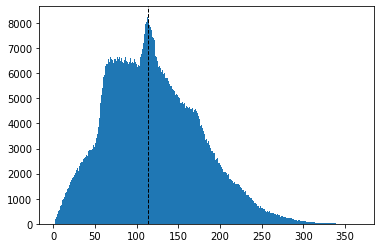

In [15]:
make_hist(pulls)

In [16]:
pulls = make_pulls(
    pull_type=EXPECTED_RESULT,
    pull_count=10,
    samples=SAMPLES,
)

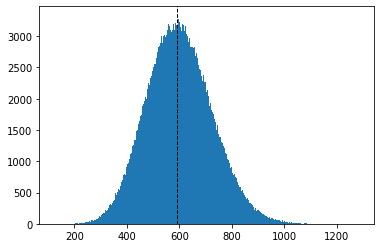

In [17]:
make_hist(pulls)